In [25]:
import pandas as pd
import numpy as np
import jieba
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense
from sklearn.model_selection import train_test_split
from keras.layers import LSTM
from keras import layers
from keras import regularizers
from sklearn import metrics

In [26]:
df=pd.read_csv('train.csv',encoding = 'utf-8')


In [27]:
x_train=[]
y_train=[]
x=[]

In [28]:
for i in range(len(df)):
     x.append(df['label\tcomment'][i].split('\t')[1])
     x_train.append(' '.join(jieba.cut(x[i],cut_all=False)))
     y_train.append(df['label\tcomment'][i].split('\t')[0])

In [29]:
def get_custom_stopwords(stop_words_file):
    with open(stop_words_file) as f:
        stopwords = f.read()
    stopwords_list = stopwords.split('\n')
    custom_stopwords_list = [i for i in stopwords_list]
    return custom_stopwords_list

In [30]:
stop_words_file = "哈工大停用词表.txt"
stopwords = get_custom_stopwords(stop_words_file)

In [31]:
fil_x=[]
for i in range(len(x_train)):
    q=x_train[i].split()
    strr=''
    for word in q:
        if word not in stopwords:
            strr=strr+word+' '
    fil_x.append(strr)

In [32]:
data_y=np.asarray(y_train)

In [33]:
num_words =12000   #设置的最大词数
max_len=50

tk = Tokenizer(num_words=num_words+1)  #因为要加未登录词，所以+1

tk.fit_on_texts(fil_x)
tk.word_index[tk.oov_token] = num_words + 1 
sequence=tk.texts_to_sequences(fil_x)
data_x=pad_sequences(sequence,maxlen=max_len)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, random_state=1,train_size=0.8,test_size=0.2)

In [35]:
dff=pd.read_csv('test_new.csv',encoding = 'utf-8')
id=[]
x_test=[]
x1=[]
for i in range(len(dff)):
     x1.append(dff['comment'][i])
     id.append(dff['id'][i])
     x_test.append(' '.join(jieba.cut(x1[i],cut_all=False)))

In [36]:
fil_x_test=[]
for i in range(len(x_test)):
    q=x_test[i].split()
    strr=''
    for word in q:
        if word not in stopwords:
            strr=strr+word+' '
    fil_x_test.append(strr)

In [37]:
sequence1=tk.texts_to_sequences(fil_x_test)
data_x_test=pad_sequences(sequence1,maxlen=max_len)

In [ ]:
model=Sequential()
model.add(Embedding(num_words,120,input_length=max_len))
model.add(layers.Bidirectional(layers.LSTM(50,dropout=0.1,recurrent_dropout=0.5)))#output_dim=60
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history=model.fit(X_train,Y_train,epochs=20,batch_size=64,validation_data=(X_test,Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 120)           1440000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               68400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,508,501
Trainable params: 1,508,501
Non-trainable params: 0
_________________________________________________________________


D:\anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 13s 2ms/step - loss: 0.3016 - acc: 0.8788 - val_loss: 0.1695 - val_acc: 0.9300
Epoch 2/20
8000/8000 [==============================] - 11s 1ms/step - loss: 0.1265 - acc: 0.9521 - val_loss: 0.1245 - val_acc: 0.9515
Epoch 3/20
8000/8000 [==============================] - 12s 2ms/step - loss: 0.0746 - acc: 0.9741 - val_loss: 0.1125 - val_acc: 0.9630
Epoch 4/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.0552 - acc: 0.9810 - val_loss: 0.1083 - val_acc: 0.9685
Epoch 5/20
8000/8000 [==============================] - 12s 1ms/step - loss: 0.0443 - acc: 0.9850 - val_loss: 0.1207 - val_acc: 0.9665
Epoch 6/20
8000/8000 [==============================] - 12s 1ms/step - loss: 0.0326 - acc: 0.9890 - val_loss: 0.1433 - val_acc: 0.9600
Epoch 7/20
8000/8000 [==============================] - 12s 1ms/step - loss: 0.0270 - acc: 0.9915 - val_loss: 0.1334 - val_acc: 0.9650
Epoch 8

In [15]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

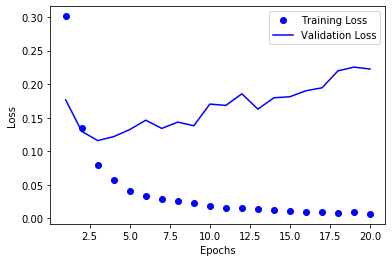

In [17]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

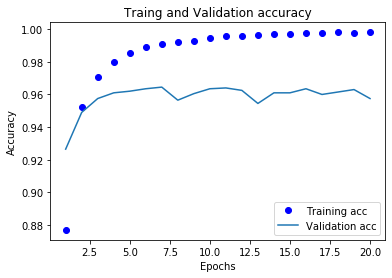

In [18]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs,acc,'bo',label="Training acc")
plt.plot(epochs,val_acc,label='Validation acc')
plt.title("Traing and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
model=Sequential()
model.add(Embedding(num_words,120,input_length=max_len))
model.add(layers.Bidirectional(layers.LSTM(50,dropout=0.1,recurrent_dropout=0.5)))#output_dim=60
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(X_train,Y_train,epochs=7,batch_size=64,validation_data=(X_test,Y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 120)           1440000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               68400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,508,501
Trainable params: 1,508,501
Non-trainable params: 0
_________________________________________________________________


D:\anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8000 samples, validate on 2000 samples
Epoch 1/7
8000/8000 [==============================] - 12s 2ms/step - loss: 0.3048 - acc: 0.8715 - val_loss: 0.1784 - val_acc: 0.9250
Epoch 2/7
8000/8000 [==============================] - 11s 1ms/step - loss: 0.1266 - acc: 0.9525 - val_loss: 0.1305 - val_acc: 0.9505
Epoch 3/7
8000/8000 [==============================] - 11s 1ms/step - loss: 0.0811 - acc: 0.9693 - val_loss: 0.1183 - val_acc: 0.9545
Epoch 4/7
8000/8000 [==============================] - 12s 1ms/step - loss: 0.0552 - acc: 0.9805 - val_loss: 0.1164 - val_acc: 0.9635
Epoch 5/7
8000/8000 [==============================] - 12s 1ms/step - loss: 0.0446 - acc: 0.9854 - val_loss: 0.1272 - val_acc: 0.9605
Epoch 6/7
8000/8000 [==============================] - 12s 1ms/step - loss: 0.0360 - acc: 0.9886 - val_loss: 0.1364 - val_acc: 0.9600
Epoch 7/7
8000/8000 [==============================] - 12s 1ms/step - loss: 0.0288 - acc: 0.9904 - val_loss: 0.1489 - val_acc: 0.9630


In [20]:
result=model.evaluate(X_test,Y_test)
print(result)

2000/2000 [==============================] - 1s 307us/step
[0.14891733892634512, 0.9629999995231628]


In [21]:
features1=model.predict(data_x_test)
output1=[]
for i in range(len(features1)):
    if features1[i][0]>0.5 or features1[i][0]==0.5:
        output1.append(1)
    else :
        output1.append(0)
        

In [22]:
import pandas as pd
df3=pd.read_csv("correct.csv",encoding='utf-8')
df3=df3['label']
df3array=df3.values
df3array

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [23]:
TN =0
TP=0
FP=0
FN=0

for i in range(len(output1)):
    if (output1[i]==0)and(int(df3array[i])==0):
        TN=TN+1
    if (output1[i]==1)and(int(df3array[i])==1):
        TP=TP+1
    if (output1[i]==0)and(int(df3array[i])==1):
        FN=FN+1
    if (output1[i]==1)and(int(df3array[i])==0):
        FP=FP+1;
acc=(TP/(TP+FP))
callbackrate=TP/(TP+FN)
score=(2*acc*callbackrate)/(acc+callbackrate)
print(score)

0.19399538106235567


In [24]:
(output1)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,


In [ ]:
print(len(id))
print(len(output1))

In [ ]:
dataFrameToSave=pd.DataFrame({'id':id,'label':output1})
dataFrameToSave.shape
dataFrameToSave.to_csv("sample.csv",index=False,sep=",")

In [ ]:
dataFrameToSave